In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Create a function to calculate ECDF given a column series
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y  

In [3]:
# Import dataset for Belmont Stakes results
df = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/7507bfed990379f246b4f166ea8a57ecf31c6c9d/belmont.csv')

In [4]:
df.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     91 non-null     int64  
 1   Winner   91 non-null     object 
 2   Jockey   91 non-null     object 
 3   Trainer  91 non-null     object 
 4   Owner    91 non-null     object 
 5   Time     91 non-null     object 
 6   Track    91 non-null     object 
 7   miles    91 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.8+ KB


In [6]:
# Convert the Time field to a datetime dtype
df['Time'] = pd.to_datetime(df['Time'], format='%M:%S.%f')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     91 non-null     int64         
 1   Winner   91 non-null     object        
 2   Jockey   91 non-null     object        
 3   Trainer  91 non-null     object        
 4   Owner    91 non-null     object        
 5   Time     91 non-null     datetime64[ns]
 6   Track    91 non-null     object        
 7   miles    91 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 5.8+ KB


In [8]:
df.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,1900-01-01 00:02:28.510,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",1900-01-01 00:02:26.650,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,1900-01-01 00:02:28.520,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,1900-01-01 00:02:30.700,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,1900-01-01 00:02:30.420,Belmont,1.5


In [9]:
# Create a column stating Time in seconds as a float
df['Time_sec'] = (df.Time.dt.minute * 60) + df.Time.dt.second + (df.Time.dt.microsecond / 1000000)

In [10]:
df.Time_sec.dtype

dtype('float64')

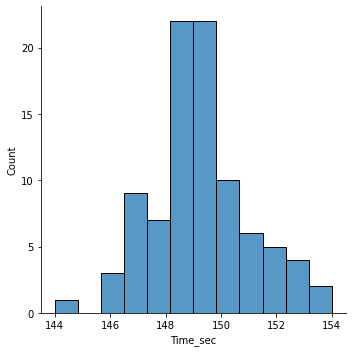

In [11]:
# Plot the distribution of the Time_sec column
sns.displot(data=df.Time_sec)

<AxesSubplot:>

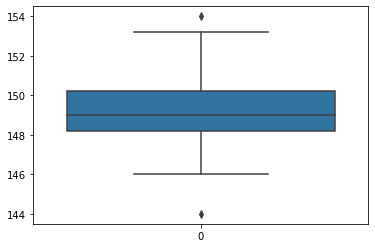

In [12]:
sns.boxplot(data=df.Time_sec)

In [13]:
df.Time_sec.max()

154.0

In [14]:
# Filter outlier datapoints from dataset
df.query('Time_sec < 154.0 and Time_sec >= 146.0', inplace=True)

<AxesSubplot:>

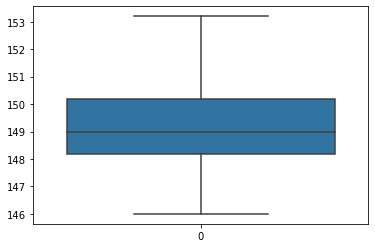

In [15]:
sns.boxplot(data=df.Time_sec)

In [16]:
# Make a series of the Time_sec column
belmont_no_outliers = df.Time_sec

## Determine if the Time_sec is a normal distribution

In [17]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

In [18]:
# Sample out of a normal distribution with this mu and sigma: samples
samples  = np.random.normal(mu, sigma, size=10000)

In [19]:
# Get the CDF of the samples and of the data
x, y =ecdf(belmont_no_outliers)
x_theor, y_theor = ecdf(samples)

Text(0, 0.5, 'CDF')

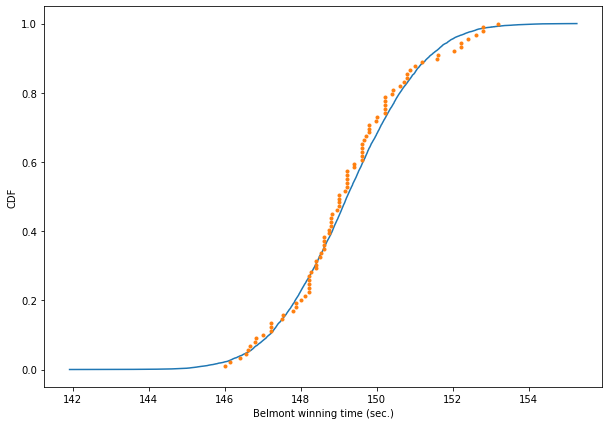

In [20]:
# Plot the CDFs and show the plot
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Belmont winning time (sec.)')
plt.ylabel('CDF')

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

## What are the chances of a horse matching or beating Secretariat's record?

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?